### **Exercise: Outlier Detection and Removal using Quantile, Standard Deviation and Z-score Methods**

This notebook provides the solution for exercise on outlier detection and removal using the Bangalore House Prices (`bhp.csv`) dataset. We will focus on two of the most common and effective methods:

1.  **Percentile Method:** A non-parametric technique that is robust to extreme values.
2.  **Standard Deviation and Z-Score Method:** A statistical approach most effective on data that follows a normal or Gaussian distribution.

We will perform these steps end-to-end on the `price_per_sqft` column to clean our data and prepare it for building a robust machine learning model.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
# Load the dataset
df = pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
# Statistical summary of the dataset
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


### Step 1: Outlier Removal using the Percentile Method

* The `price_per_sqft` column has a massive range, from `2.67e+02` (267) to `1.20e+07` (1.2 Crore), as shown in the `df.describe()` output. This indicates the presence of extreme outliers. 

* We will use the percentile method to remove these most obvious outliers, which can heavily influence the mean and standard deviation.

In [4]:
# Set the lower and upper bounds using the 0.1% and 99.9% percentiles
lower_limit, upper_limit = df['price_per_sqft'].quantile([0.001, 0.999])
print(f"Lower bound: {lower_limit:.2f}")
print(f"Upper bound: {upper_limit:.2f}")

Lower bound: 1366.18
Upper bound: 50959.36


In [5]:
# Filter the original dataframe to create a new one without the outliers
df_percentile_cleaned = df[(df['price_per_sqft'] > lower_limit) & (df['price_per_sqft'] < upper_limit)]

print(f"Original DataFrame Shape: {df.shape}")
print(f"Cleaned DataFrame Shape: {df_percentile_cleaned.shape}")
print(f"Number of outliers removed: {df.shape[0] - df_percentile_cleaned.shape[0]}")

Original DataFrame Shape: (13200, 7)
Cleaned DataFrame Shape: (13172, 7)
Number of outliers removed: 28


### Step 2: Outlier Removal using Standard Deviation

* The standard deviation method is based on the **Empirical Rule** or the **68-95-99.7 Rule**. 

* It states that for a normal distribution, approximately 99.7% of the data falls within three standard deviations of the mean. 

* We will use a more aggressive threshold of **4 standard deviations** to remove stricter outliers from our cleaned dataset from Step 1.

In [6]:
# Use the percentile-cleaned dataframe for this step
df_std = df_percentile_cleaned.copy()

# Calculate the mean and standard deviation of the cleaned data
mean_val = df_std['price_per_sqft'].mean()
std_dev_val = df_std['price_per_sqft'].std()

print(f"Mean: {mean_val:.2f}")
print(f"Standard Deviation: {std_dev_val:.2f}")

Mean: 6663.65
Standard Deviation: 4141.02


In [7]:
# Define the lower and upper bounds for 4 standard deviations
lower_limit_std_dev = mean_val - 4 * std_dev_val
upper_limit_std_dev = mean_val + 4 * std_dev_val

print(f"Lower bound (4 Std Dev): {lower_limit_std_dev:.2f}")
print(f"Upper bound (4 Std Dev): {upper_limit_std_dev:.2f}")

Lower bound (4 Std Dev): -9900.43
Upper bound (4 Std Dev): 23227.74


In [8]:
# Create the new dataframe with outliers removed using the standard deviation method
df_std_cleaned = df_std[(df_std['price_per_sqft'] > lower_limit_std_dev) & (df_std['price_per_sqft'] < upper_limit_std_dev)]

print(f"DataFrame Shape after Std Dev Removal: {df_std_cleaned.shape}")
print(f"Number of outliers removed in this step: {df_std.shape[0] - df_std_cleaned.shape[0]}")

DataFrame Shape after Std Dev Removal: (13047, 7)
Number of outliers removed in this step: 125


### Step 3: Visualizing the Cleaned Data

* Visualizing the data after outlier removal is a crucial step to confirm that our method has made the distribution more normal, which is beneficial for many statistical and machine learning models. 

* We will plot a histogram with a bell curve to see the change in distribution.

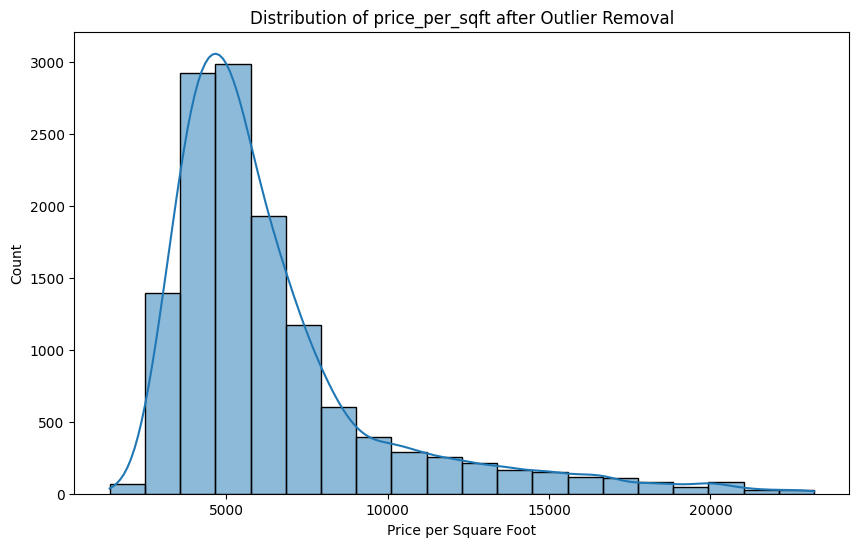

In [9]:
# Visualize the histogram 
plt.figure(figsize=(10, 6))
sns.histplot(df_std_cleaned['price_per_sqft'], bins=20, kde=True)
plt.title('Distribution of price_per_sqft after Outlier Removal')
plt.xlabel('Price per Square Foot')
plt.ylabel('Count')
plt.show()

### Step 4: Outlier Removal using the Z-Score Method*

* The Z-score method is conceptually very similar to the standard deviation method. 

* A Z-score measures how many standard deviations a data point is from the mean. 

* A Z-score threshold of 4 is equivalent to a 4-standard deviation threshold. 

* We will use this on our `df_percentile_cleaned` dataframe, and you'll see the exact same result as the previous step.

In [10]:
# Use the percentile-cleaned dataframe for this step
df_zscore = df_percentile_cleaned.copy()

# Calculate the Z-score for each data point
df_zscore['zscore'] = (df_zscore['price_per_sqft'] - df_zscore['price_per_sqft'].mean()) / df_zscore['price_per_sqft'].std()

In [11]:
# Find outliers using a Z-score threshold of 4
outliers_zscore = df_zscore[(df_zscore['zscore'] < -4) | (df_zscore['zscore'] > 4)]
print(f"Number of outliers removed using Z-Score method: {outliers_zscore.shape[0]}")
outliers_zscore.head()

Number of outliers removed using Z-Score method: 125


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725


In [12]:
# Create the final dataframe with Z-score outliers removed
df_zscore_cleaned = df_zscore[(df_zscore['zscore'] > -4) & (df_zscore['zscore'] < 4)]

print(f"DataFrame shape after Z-Score removal: {df_zscore_cleaned.shape}")
print(f"Number of outliers removed: {df_zscore.shape[0] - df_zscore_cleaned.shape[0]}")

DataFrame shape after Z-Score removal: (13047, 8)
Number of outliers removed: 125


### Summary

* As you can see, both the 4-standard deviation method and the Z-score method (with a threshold of 4) yield the exact same results. 

* This is because the Z-score is a standardized representation of how many standard deviations a data point is away from the mean.

* By systematically removing outliers using these methods, we have created a much cleaner and more representative dataset that is better suited for training a machine learning model for accurate house price prediction.

---